In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [115]:
# load the final datasets
car_data = pd.read_csv('./final_carDetails.csv')
car_data.head()

,Fuel_Type,Body_Type,transmission,ownerNo,Brand,model,modelYear,price,Insurance_Validity,Kms_Driven,Mileage,Engine,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,400000.0,Third Party insurance,120000.0,23.10,998,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,811000.0,Comprehensive,32706.0,17.00,1497,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,585000.0,Comprehensive,11949.0,23.84,1199,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,Comprehensive,17794.0,19.10,1197,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,Third Party insurance,60000.0,23.65,1248,5,Gray,Bangalore


## Visualization of dataset

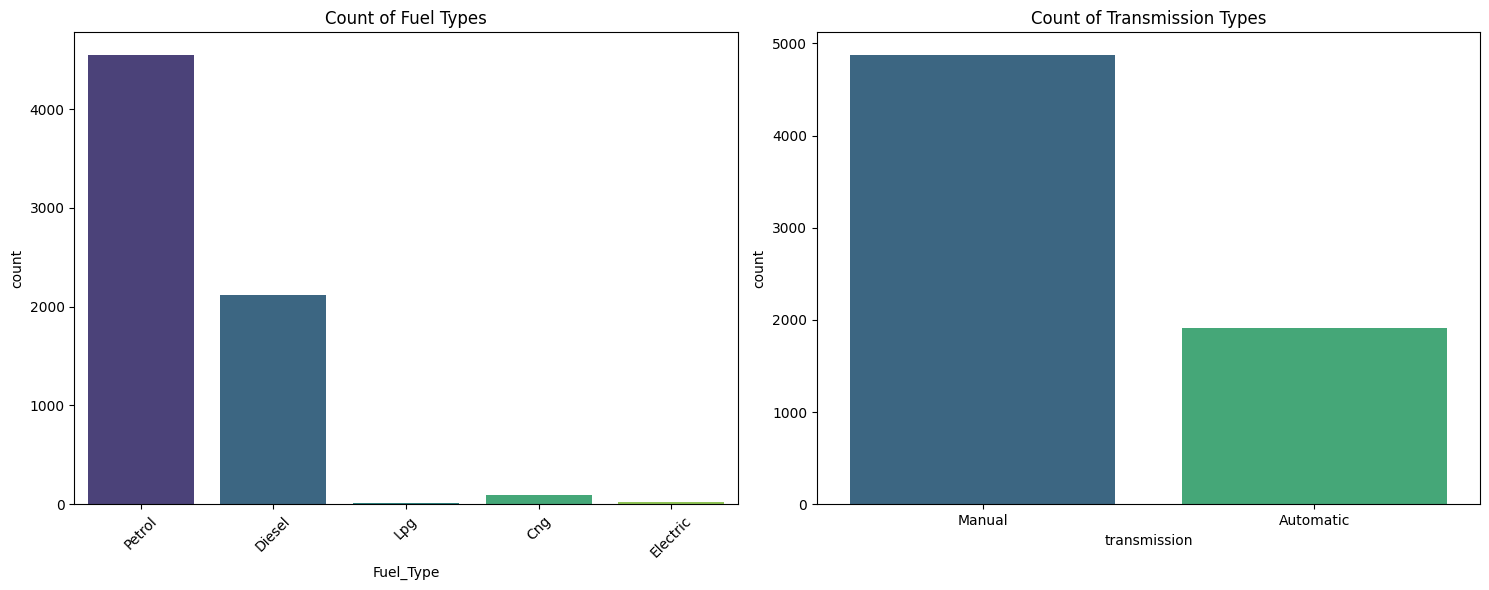

In [116]:
# line plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Plot for Fuel_Type
sns.countplot(x='Fuel_Type', data=car_data, palette='viridis', ax=axes[0])
axes[0].set_title('Count of Fuel Types')
axes[0].tick_params(axis='x', rotation=45) 

# Plot for Transmission
sns.countplot(x='transmission', data=car_data, palette='viridis', ax=axes[1])
axes[1].set_title('Count of Transmission Types')

plt.tight_layout()
plt.show()

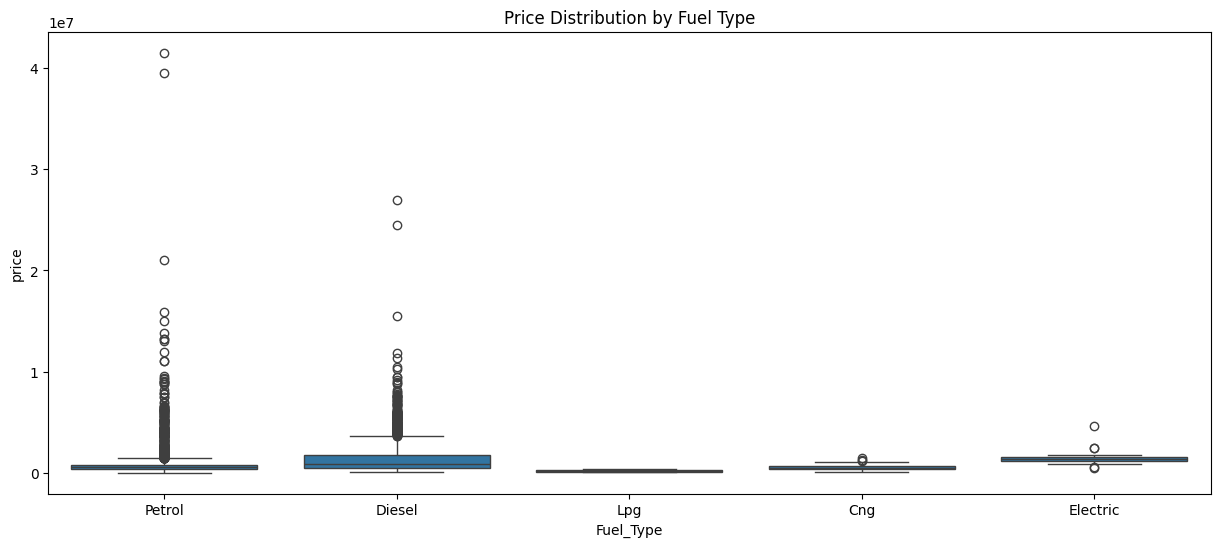

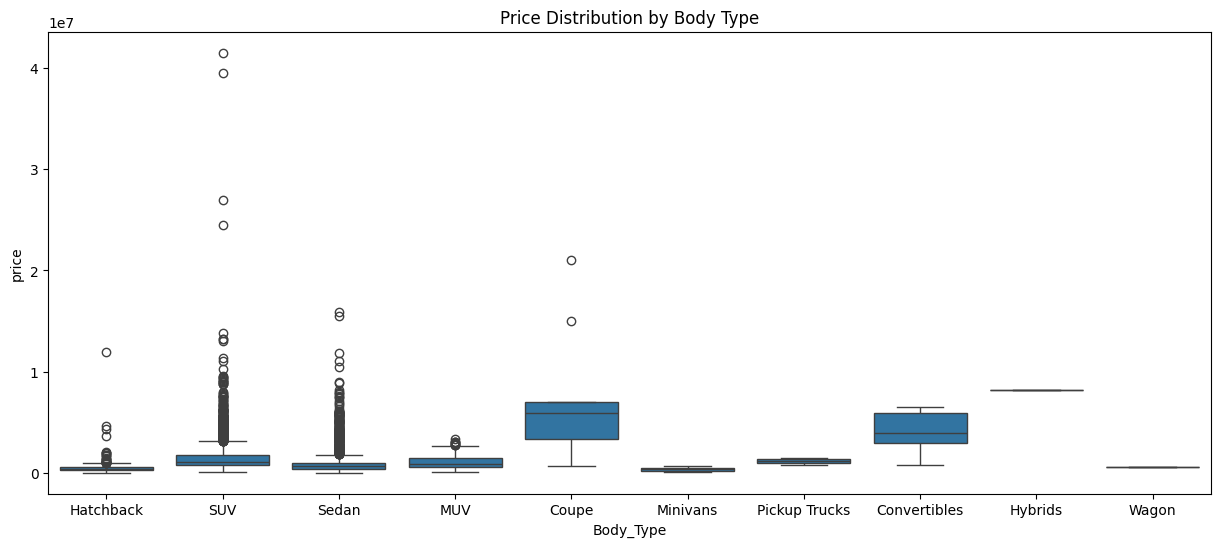

In [117]:
# Price Distribution
plt.figure(figsize=(15,6))
sns.boxplot(x='Fuel_Type', y='price', data=car_data)
plt.title('Price Distribution by Fuel Type')
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(x='Body_Type', y='price', data=car_data)
plt.title('Price Distribution by Body Type')
plt.show()


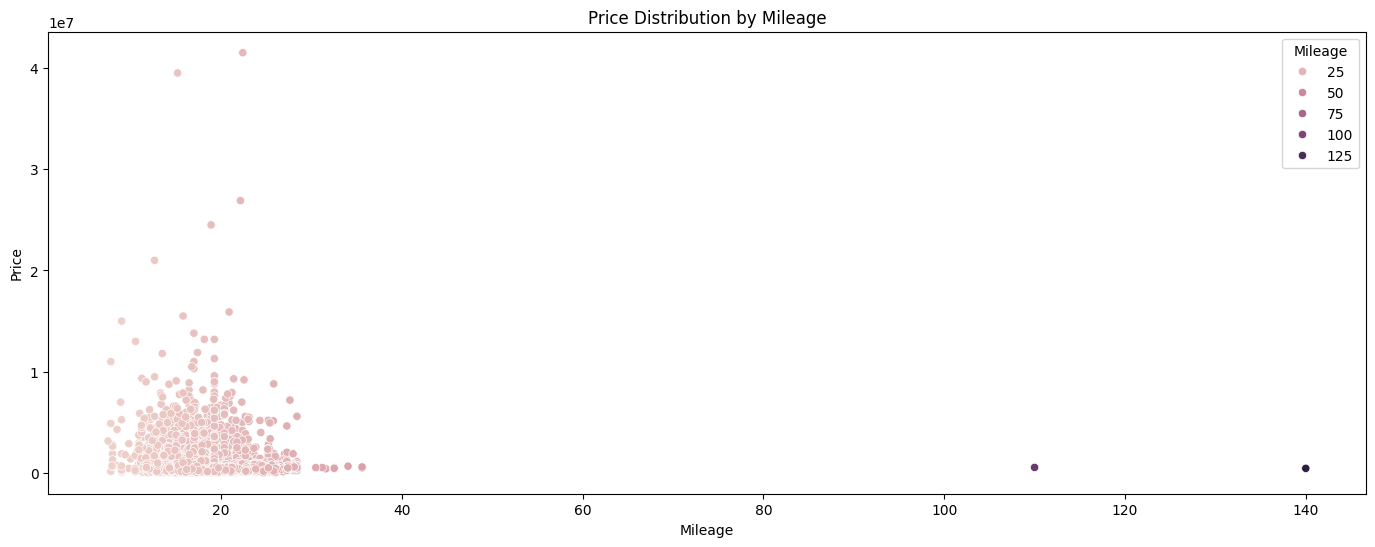

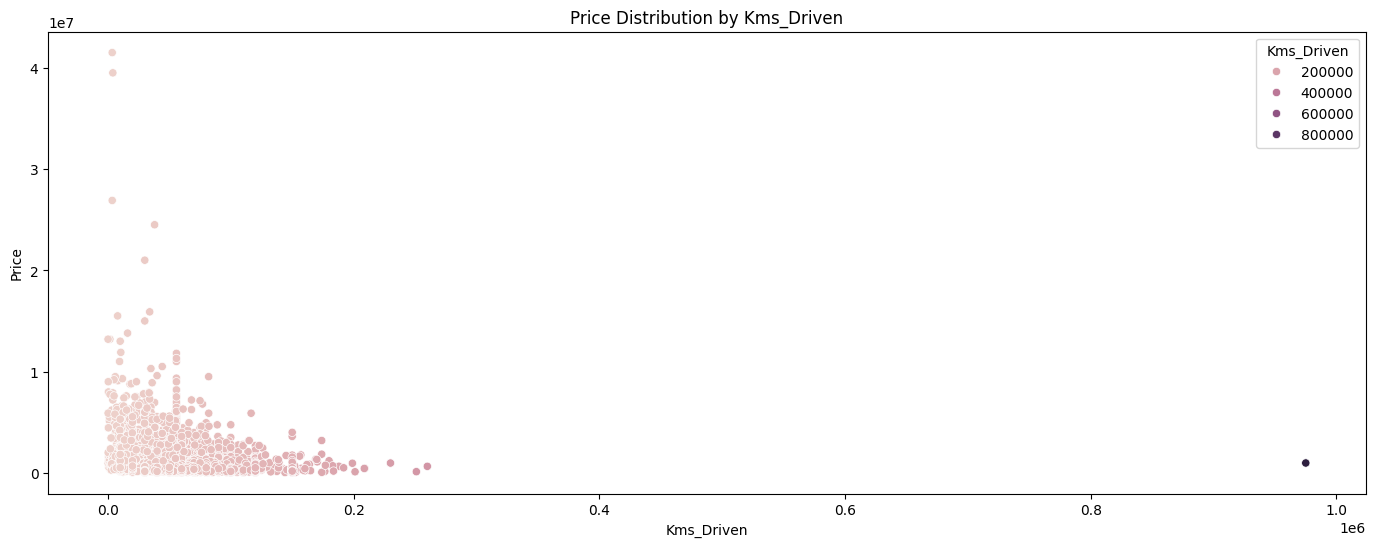

In [118]:

# Scatter plot
plt.figure(figsize=(17,6))
sns.scatterplot(data= car_data, x='Mileage', y='price', hue='Mileage')
plt.title("Price Distribution by Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(17,6))
sns.scatterplot(data= car_data, x='Kms_Driven', y='price', hue='Kms_Driven')
plt.title("Price Distribution by Kms_Driven")
plt.xlabel("Kms_Driven")
plt.ylabel("Price")
plt.show()


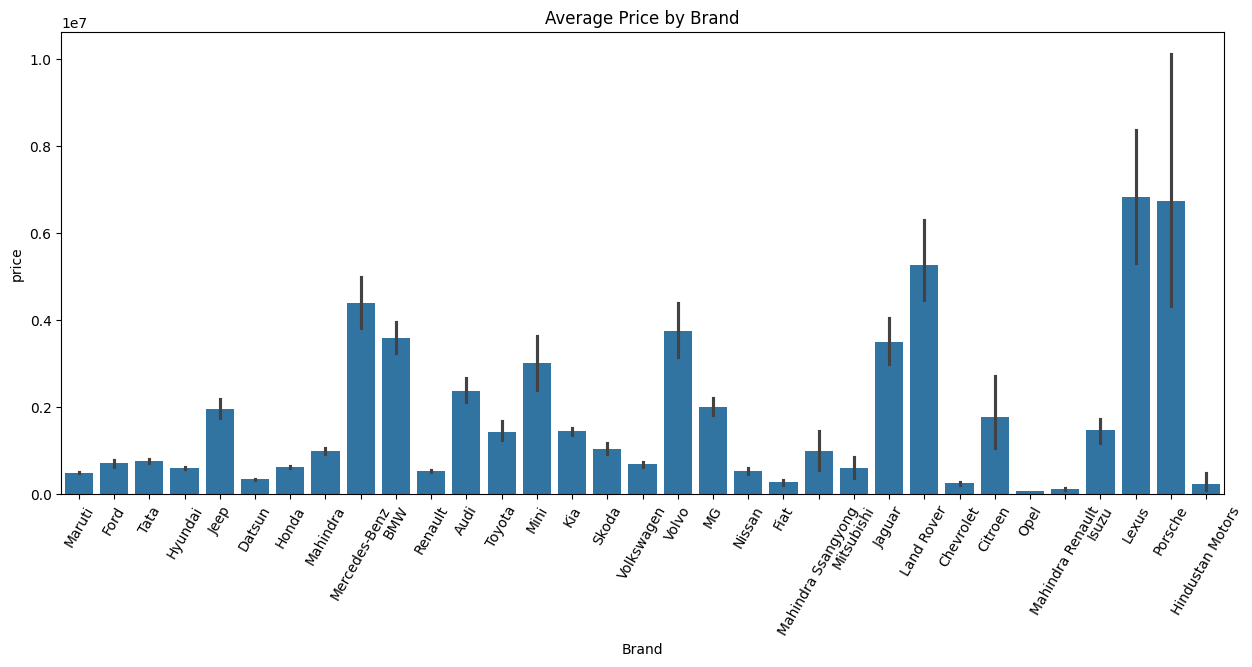

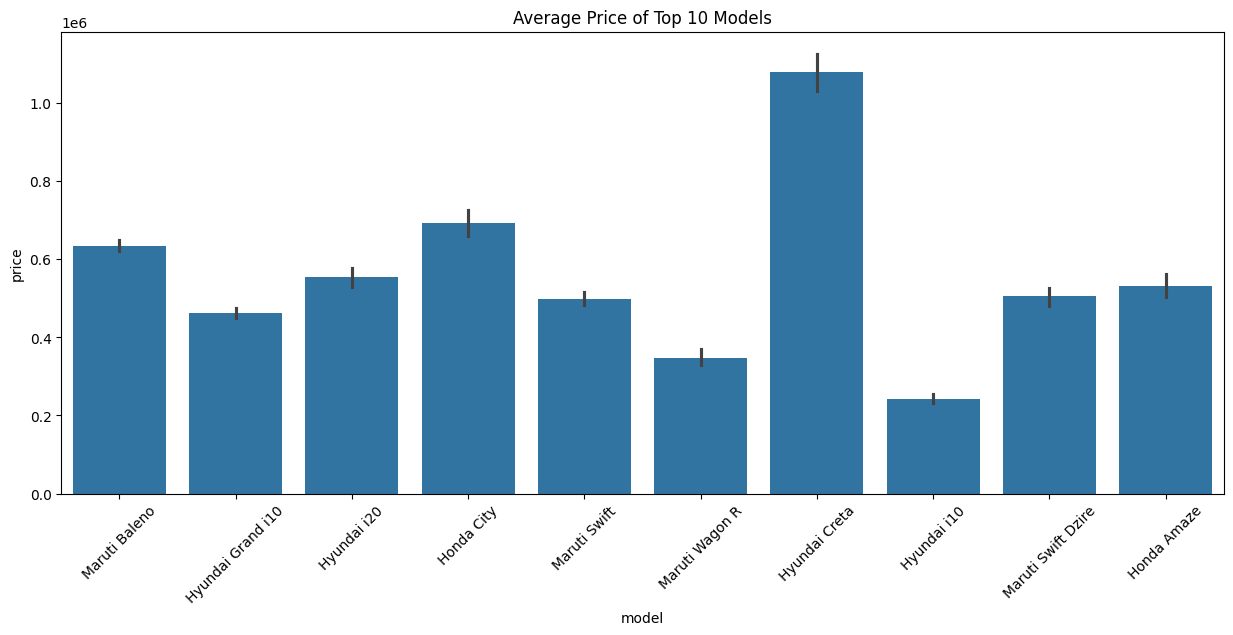

In [119]:
# Bar Plot of Average Price per Brand and Model
# Average price by Brand
plt.figure(figsize=(15, 6))
sns.barplot(x='Brand', y='price', data=car_data, estimator='mean')
plt.title('Average Price by Brand')
plt.xticks(rotation=60)
plt.show()

# Average price by Model
top_models = car_data['model'].value_counts().nlargest(10).index  # Top 10 most common models
plt.figure(figsize=(15, 6))
sns.barplot(x='model', y='price', data=car_data[car_data['model'].isin(top_models)], estimator='mean')
plt.title('Average Price of Top 10 Models')
plt.xticks(rotation=45)
plt.show()


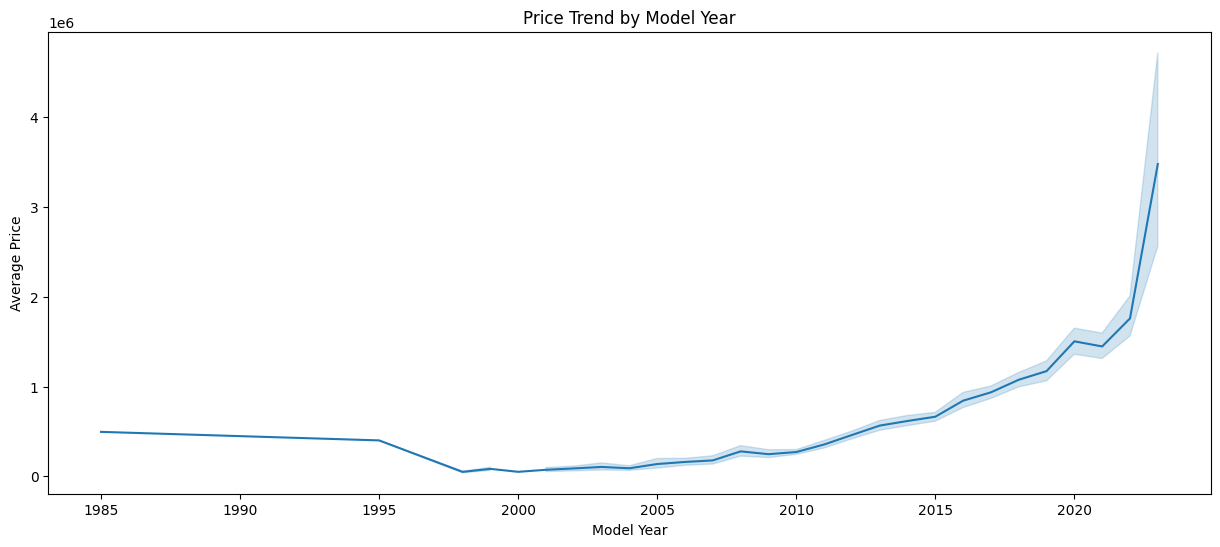

In [120]:
# Time Series Plot for Price by Model Year
plt.figure(figsize=(15, 6))
sns.lineplot(x='modelYear', y='price', data=car_data)
plt.title('Price Trend by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.show()


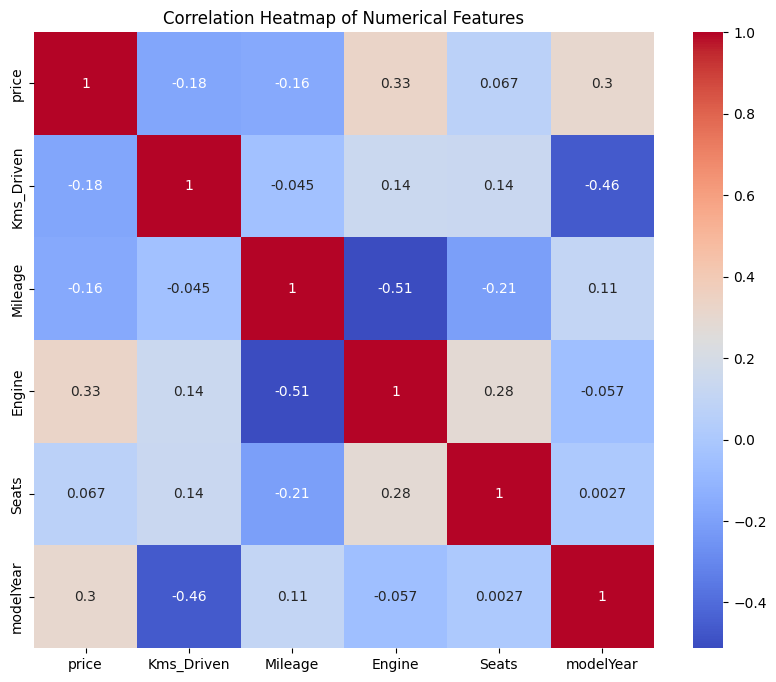

In [121]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(car_data[['price', 'Kms_Driven', 'Mileage', 'Engine', 'Seats', 'modelYear']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## Outlier Treatment

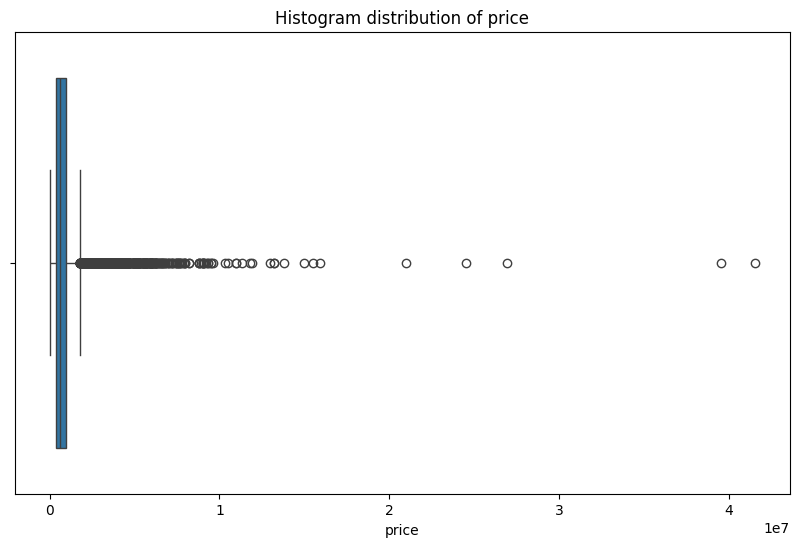

In [122]:
# boxplot  the price
plt.figure(figsize=(10,6))
sns.boxplot(x="price", data=car_data)
plt.title("Histogram distribution of price")
plt.show()

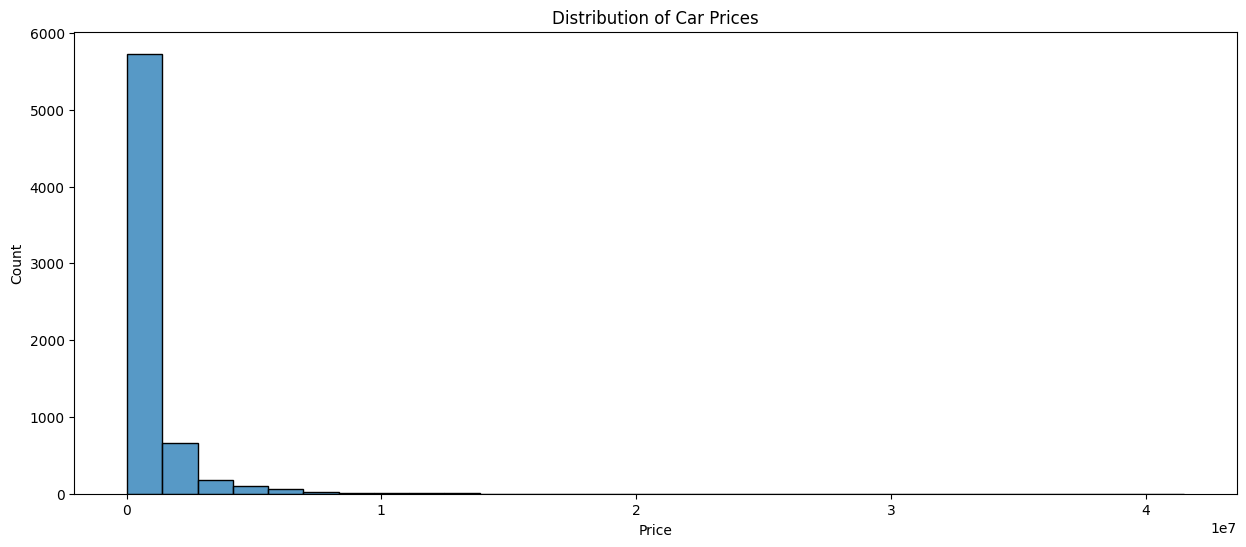

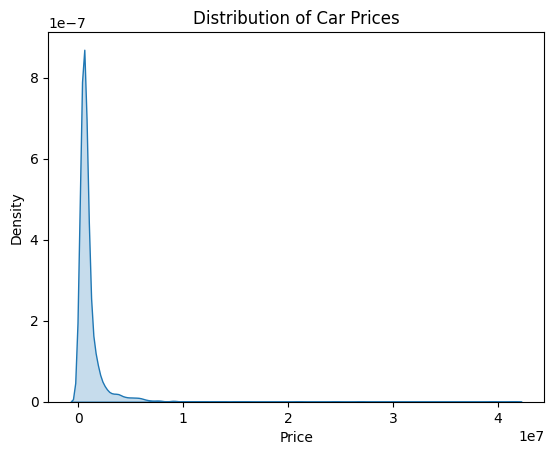

In [123]:
# histogram of price before outlier
plt.figure(figsize=(15, 6))
sns.histplot(data=car_data, x='price', bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.show()

sns.kdeplot(data=car_data, x='price', shade=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.show()

In [124]:
# removing outliers using IQR
Q1 = car_data['price'].quantile(0.25)
Q3 = car_data['price'].quantile(0.75)
IQR = Q3 - Q1 

# upper bound and lower bound
# outliers = car_data[(car_data['price'] < (Q1 - 1.5 * IQR)) | (car_data['price'] > (Q3 + 1.5 * IQR))]
outliers = car_data[(car_data['price'] >= (Q1 - 1.5 * IQR)) & (car_data['price'] <= (Q3 + 1.5 * IQR))]

In [125]:
car_data = outliers

In [126]:
car_data.shape

(6034, 15)

## Encoding Categorical Variables

In [127]:
# from sklearn.preprocessing import OneHotEncoder

In [128]:
# select the categorial column
categorical_column = car_data.select_dtypes(include='object').columns

In [129]:
# Applying the One-Hot Encoding for all categorical columns ( as they appear nominal)
car_data_encoded = pd.get_dummies(car_data, columns=categorical_column, drop_first=True, dtype='int')

In [130]:
car_data_encoded.head()

,ownerNo,modelYear,price,Kms_Driven,Mileage,Engine,Seats,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Lpg,...,Color_Urban Titanium Metallic,Color_Violet,Color_White,Color_Wine Red,Color_Yellow,Color_golden brown,City_Chennai,City_Delhi,City_Jaipur,City_Kolkata
0,3,2015,400000.0,120000.0,23.10,998,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,2018,811000.0,32706.0,17.00,1497,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,2018,585000.0,11949.0,23.84,1199,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2014,462000.0,17794.0,19.10,1197,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2015,790000.0,60000.0,23.65,1248,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
car_data_encoded.describe()

,ownerNo,modelYear,price,Kms_Driven,Mileage,Engine,Seats,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Lpg,...,Color_Urban Titanium Metallic,Color_Violet,Color_White,Color_Wine Red,Color_Yellow,Color_golden brown,City_Chennai,City_Delhi,City_Jaipur,City_Kolkata
count,6034.000000,6034.000000,6.034000e+03,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,...,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000
mean,1.382831,2016.230527,6.265893e+05,57333.505067,19.524561,1348.481604,5.146172,0.266987,0.002983,0.001657,...,0.000331,0.000663,0.178323,0.000166,0.002652,0.000166,0.202188,0.200862,0.172025,0.207325
std,0.672401,3.909221,3.634525e+05,32892.884536,3.840862,399.859686,0.575636,0.442422,0.054541,0.040679,...,0.018204,0.025741,0.382816,0.012874,0.051430,0.012874,0.401665,0.400678,0.377434,0.405424
min,0.000000,1985.000000,2.800000e+04,150.000000,7.810000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2014.000000,3.650000e+05,37781.250000,17.400000,1197.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2017.000000,5.500000e+05,55763.564764,19.260860,1199.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2019.000000,8.000000e+05,70000.000000,21.630000,1497.000000,5.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2023.000000,1.779000e+06,975000.000000,140.000000,5000.000000,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 # Traning and Testing the Model

In [132]:
import pickle
# split the data 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [133]:
# X and y
X = car_data_encoded.drop("price", axis=1)
y = car_data_encoded['price']

In [134]:
# 1. Data Preparation

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [135]:
# Save the scaler for consistent transformation
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [136]:
# define a funtion to find the best algorithm 
def find_best_algorithm(X_train, X_test, y_train, y_test):
    
    # define the models to evaluate 
    models = {
        "Linear Regression" : LinearRegression(),
        "Decision Tree" : DecisionTreeRegressor(random_state=42),
        "Random Forest" : RandomForestRegressor(random_state=42),
        "Gradient Boosting" : GradientBoostingRegressor(random_state=42)
    }

    # dict to store the evaluation metrics 
    model_metrics = {}
    best_r2 = -np.inf
    best_model = None
    best_model_name = None
    
    for model_name, model in models.items():
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred = model.predict(X_test)
        
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # store metrics
        model_metrics[model_name] = {'MAE' : mae, 'MSE': mse, 'R2': r2}
        
        
        # check if this model has the highest R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_model_name = model_name
            
            
        # plot actual vs priedicted values
        plt.figure(figsize=(8,6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{model_name} - Actual vs Predicted")
        plt.show()
        
        print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")
        print("\n")
        
        print(f"Trainscore: {model.score(X_train, y_train)}")
        print(f"Testscore: {model.score(X_test, y_test)}")

    # print the best model
    print("-------------------------------")
    print("\nBest Model:")
    print(f"{best_model_name} - R2: {best_r2:.2f}")
    print(f"MAE: {model_metrics[best_model_name]['MAE']:.2f}")
    print(f"MSE: {model_metrics[best_model_name]['MSE']:.2f}")
    
    # Save the best model
    with open(f"{best_model_name}.pkl", 'wb') as f:
        pickle.dump(best_model, f)
        
    return best_model, model_metrics
    

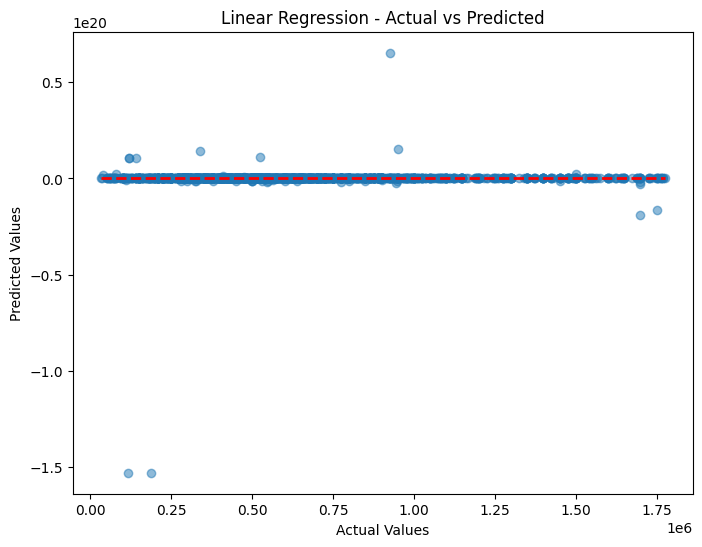

Linear Regression - MAE: 289311195274092288.00, MSE: 29110369910941703972753767749799378944.00, R2: -227858552161552296426078208.00


Trainscore: 0.9035745681324795
Testscore: -2.278585521615523e+26


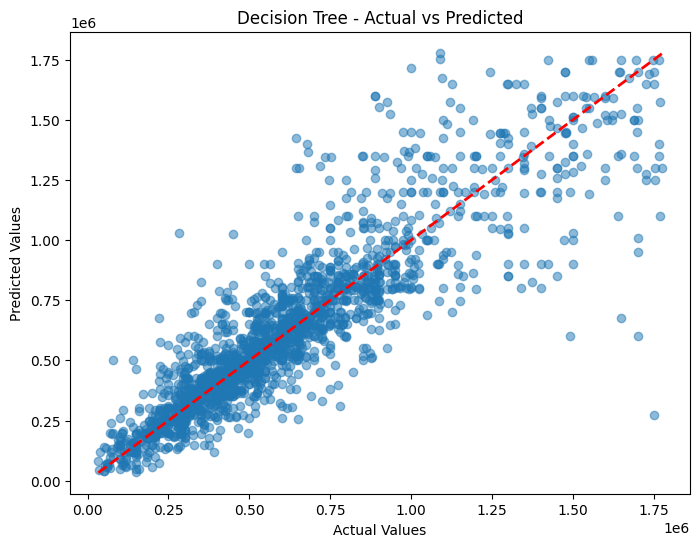

Decision Tree - MAE: 112573.31, MSE: 29730457614.84, R2: 0.77


Trainscore: 0.9996489410499471
Testscore: 0.7672877724349475


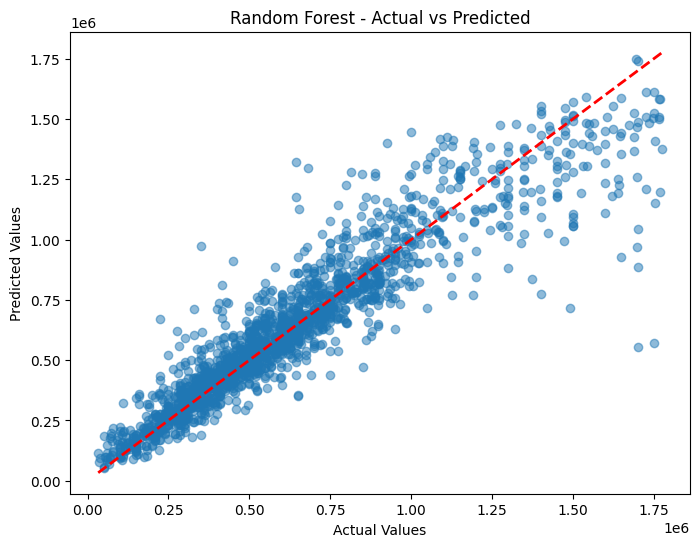

Random Forest - MAE: 85828.33, MSE: 17994444359.83, R2: 0.86


Trainscore: 0.981296046905389
Testscore: 0.8591502598103229


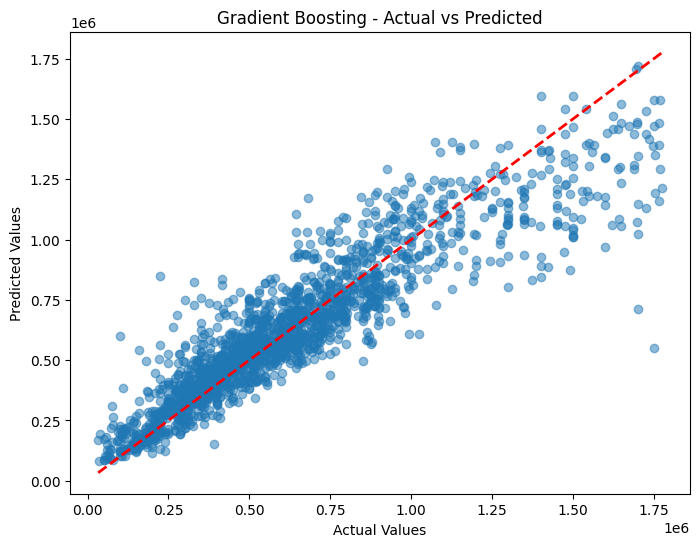

Gradient Boosting - MAE: 103547.78, MSE: 22306307801.65, R2: 0.83


Trainscore: 0.8585012968632554
Testscore: 0.8253995735779316
-------------------------------

Best Model:
Random Forest - R2: 0.86
MAE: 85828.33
MSE: 17994444359.83


In [137]:
# call the function
best_model, metrics = find_best_algorithm(X_train_scaled, X_test_scaled, y_train, y_test)

# Cross - validation of model selected

In [138]:

# from sklearn.model_selection import cross_val_score  # for cross validation

# cv_score = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')

# cv_score = -cv_score
# print("Cross-validation score: ", cv_score)  # prints the cross-validation score

In [139]:
# print("Average of cv_score :", cv_score.mean())

# Hyperparameter Tuning and Cross-Validation with RandomizedSearchCV

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [100,200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap' : [True, False]
}

# setup gridsearch with 5-fold cross validation
random_search = RandomizedSearchCV(best_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Fit GridSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Extract the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best Parameters:", best_params)
print("Best Cross-Validation Score (Negative MAE):", random_search.best_score_)

KeyboardInterrupt: 

In [ ]:
y_pred_h = best_model.predict(X_test_scaled)
print("MAE on test set :", mean_absolute_error(y_test, y_pred_h))
print("R-squared on test set: ", r2_score(y_test,y_pred_h))


MAE on test set : 96036.24415011393
R-squared on test set:  0.841316171566782


In [ ]:
# Evaluate the model on train and test
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)

print(f"Traning set score: {train_score}")
print(f"Test set score: {test_score}")


Traning set score: 0.9695100726027205
Test set score: 0.841316171566782


# Regularization

Lasso

In [142]:
# L1 Lasso
from sklearn.linear_model import Lasso

alpha_values_L = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

values_L = []

for i in alpha_values_L:
    LassoModel = Lasso(alpha=i)
    LassoModel.fit(X_train_scaled, y_train)
    y_pred = LassoModel.predict(X_test_scaled)
    R2_score = r2_score(y_test, y_pred)
    values_L.append(R2_score)
    
print(values_L)


[0.8691572808664919, 0.869157698202429, 0.8691621956995808, 0.8692217364632789, 0.8697404121260908, 0.870761650926033, 0.8709950709734487]


In [143]:
# best value for prediction
best_alpha_lasso = alpha_values_L[np.argmax(values_L)]
LassoModel_1 = Lasso(alpha=best_alpha_lasso)
LassoModel_1.fit(X_train_scaled,y_train)
y_pred_lasso = LassoModel_1.predict(X_test_scaled)

# metrics
print(f"Lasso MAE : {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"Lasso MSE : {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso R2 : {r2_score(y_test, y_pred_lasso)}")


Lasso MAE : 84625.93421695619
Lasso MSE : 16481194884.601532
Lasso R2 : 0.8709950709734487


In [144]:
print("Training score: ", LassoModel_1.score(X_train_scaled, y_train))
print("Test score: ", LassoModel_1.score(X_test_scaled, y_test))


Training score:  0.9055649412518563
Test score:  0.8709950709734487


Ridge

In [145]:
# L2 Ridge
from sklearn.linear_model import Ridge

alpha_values_R = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

values_R = []

for i in alpha_values_R:
    RidgeModel = Ridge(alpha=i)
    RidgeModel.fit(X_train_scaled, y_train)
    y_pred = RidgeModel.predict(X_test_scaled)
    R2_score = r2_score(y_test, y_pred)
    values_R.append(R2_score)
    
print(values_R)

[0.8693592410252227, 0.8693592691736142, 0.8693595334042119, 0.8693607918368126, 0.8693240906140074, 0.8689477077168315, 0.868873798269161]


In [146]:
# best value for prediction
best_alpha_ridge = alpha_values_R[np.argmax(values_R)]
RidgeModel_1 = Ridge(alpha=best_alpha_ridge)
RidgeModel_1.fit(X_train_scaled,y_train)
y_pred_ridge = RidgeModel_1.predict(X_test_scaled)

# metrics
print(f"Ridge MAE : {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"Ridge MSE : {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Ridge R2 : {r2_score(y_test, y_pred_ridge)}")


Ridge MAE : 84897.4972267568
Ridge MSE : 16689984371.561337
Ridge R2 : 0.8693607918368126


In [147]:
print("Training score: ", LassoModel_1.score(X_train_scaled, y_train))
print("Test score: ", LassoModel_1.score(X_test_scaled, y_test))


Training score:  0.9055649412518563
Test score:  0.8709950709734487


ElasticNet

In [ ]:
# from sklearn.linear_model import ElasticNet

# alpha_values_e = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# values_e = []

# for i in alpha_values_e:
#     ElasticNetModel = ElasticNet(alpha=i)
#     ElasticNetModel.fit(X_train_scaled, y_train)
#     y_prede = ElasticNetModel.predict(X_test_scaled)
#     R2_score = r2_score(y_test, y_prede)
#     values_e.append(R2_score)
    
# print(values_e, "\n")


# # best value for prediction
# best_alpha_e = alpha_values_e[np.argmax(values_e)]
# ElasticNetModel_1 = ElasticNet(alpha=best_alpha_e)
# ElasticNetModel_1.fit(X_train_scaled,y_train)
# y_pred_e = ElasticNetModel_1.predict(X_test_scaled)

# # metrics
# print(f"e MAE : {mean_absolute_error(y_test, y_pred_e)}")
# print(f"e MSE : {mean_squared_error(y_test, y_pred_e)}")
# print(f"e R2 : {r2_score(y_test, y_pred_e)}")


# print("Training score: ", ElasticNetModel_1.score(X_train_scaled, y_train))
# print("Test score: ", ElasticNetModel_1.score(X_test_scaled, y_test))



[0.8695061028669391, 0.8701837791048082, 0.8688589576944888, 0.8679711366046154, 0.8204963991630219, 0.4838861381289232, 0.09056467283799863] 

e MAE : 84906.62951036576
e MSE : 16584842547.49514
e R2 : 0.8701837791048082
Training score:  0.9057363615999386
Test score:  0.8701837791048082


> **After doing Regularization  on dataset `Lasso` would be best compared to others MAE and R2**

## Pipeline the Model 

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder


In [149]:
X_raw = car_data.drop(columns='price', axis=1)
y_raw = car_data['price']

In [152]:
# define the numerical and categorical columns
numerical_features = X_raw.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_raw.select_dtypes(include=['object', 'category']).columns

In [153]:
# Preprocessing the categorical data
categorical_tranformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing the numerical data
numerical_transformer = StandardScaler()

In [154]:
# create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_tranformer, categorical_features)
    ]
)


best_alpha = best_alpha_lasso

# create a pipeline
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=best_alpha))
])

# Train the final Model
final_pipeline.fit(X_raw, y_raw)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['ownerNo', 'modelYear', 'Kms_Driven', 'Mileage', 'Engine', 'Seats'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Fuel_Type', 'Body_Type', 'transmission', 'Brand', 'model',
       'Insurance_Validity', 'Color', 'City'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=100))])

In [155]:
# Save the final best model
import joblib
joblib.dump(final_pipeline, 'car_price_model.pkl')


['car_price_model.pkl']